In [1]:
import warnings
warnings.filterwarnings('ignore')

#Manejo de data
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Visualizaciones
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#ML
from sklearn import *
from sklearn.ensemble import *
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Introducción - Abstract

En el presente trabajo, se analizarán datos sobre propiedades en venta en Iowa. 

Se utilizo Pandas para la manipulación de dichos datos. Se realizara un primer analisis exploratorio, utilizando gráficos en Matplotlib y Seaborn. Luego se procedera a desarrollar un modelo predictivo utilizando tecnicas de Machine Learning, con el objetivo de determinar el precio de venta de un determinado inmueble del cual se conocen todas sus demas caracteristicas.


**Definición de objetivo:** Se pretende determinar a partir de los datos, patrones generales que permitan determinar la incidencia directa de las diferentes variables sobre el precio final de los inmuebles.

**Contexto comercial:** El mercado inmobiliario de Iowa resulta, en algunos casos, extremadamente complejo. Dadas las caracteristicas propias de los inmuebles en dicho estado, los aspectos a tener en cuenta para determinar el precio de un inmueble parecen demasiado complejos para procesar analogicamente dicha información.
Este trabajo responde al pedido de visualizaciones y parámetros numericos que den pautas basicas que permitan construir un modelo adecuado para determinar el precio de los inmuebles con el menor margen de error posible.

**Problema comercial:** Se propone dar respuesta a las preguntas expuestas en el siguiente apartado, a partir del tratamiento de los datos proporcionados. Este analisis, asi como las respuestas a dichas preguntas, se acompañaran con visualizaciones y serán respaldadas por valores numericos con sus correspondientes interpretaciones.

**Contexto analítico:** Se parte de un archivo CSV (almacenado en la carpeta 'csv/house pricing') que contiene detalles sobre cada inmueble.

Se realizarán las siguientes tareas con los datos:

1- Leer, transformar y preparar datos para su visualización
2- Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
3- Intentar dar una respuesta fundamentada (si es posible) a las siguientes cuestiones (o grupos de preguntas):

* ¿Cuales variables guardan mayor correlación con el precio de venta de los inmuebles?¿Qué tanta incidencia tienen dichas variables en el precio final?
* ¿Cuales variables parecen ser irrelevantes para determinar el precio de venta?
* ¿Que tipo de modelo predictivo sería mejor para intentar determinar el precio de un inmueble a partir de sus caracteristicas?

# Exploracion de los datos

Comenzamos cargando el dataset. En este caso, el mismo esta compuesto por dos archivos csv. Por lo pronto utilizaremos solo el primero, "train.csv". El archivo "test.csv" se utilizara luego para evaluar los diferentes modelos propuestos.

In [2]:
#Cargamos el dataset
dataset = pd.read_csv('csv/house pricing/train.csv', index_col = 'Id')

dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

Vemos que, en principio, el dataset tiene una importante cantidad de información. Corroboremos el tamaño real del mismo

In [3]:
#Cargamos las primeras entradas
dataset.shape

(1460, 80)

Nuestro dataset cuenta con 80 columnas. El mismo viene acompañado de un archivo txt que contiene una breve descripción de la información contenida en cada una:

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Estadisticas generales

En la siguiente tabla se ofrecen las estadiscas descriptivas de cada columna (valor minimo, maximo, promedio, cuartiles y conteo de filas)

In [4]:
dataset.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

**Analisis univariado**

En el siguiente histograma analizaremos los valores de la columna SalePrice para entender mejor la distribución del mercado respecto de los precios de los inmuebles en Iowa

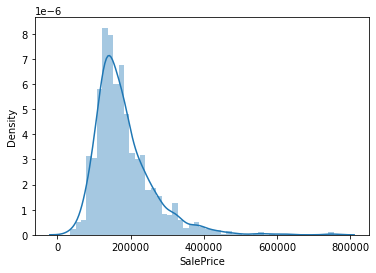

In [5]:
sns.distplot(dataset['SalePrice'])
plt.show()

Podemos observar que conforme nos acercamos al precio de USD 150000 (ciento cincuenta mil dolares) la cantidad de viviendas disponibles en el mercado aumenta. Ademas, la campana desciende de forma mas acentuada hacia el lado izquierdo, indicando una mayor cantidad de viviendas por encima de dicho precio, que por debajo.
De este cuadro, sumado a la información extraida de la tabla anterior, segun la cual la vivienda mas barata cuesta 34900 dolares, mientras que la mas cara cuesta 755000, podemos extraer como primera conclusión que el mercado inmobiliario de Iowa tiene una notable tendencia a poseer una gran cantidad de inmuebles de muy alto precio.

**Analisis bivariado**

Podríamos preguntarnos ahora si hay alguna relación directa entre el precio de los inmuebles, y, alguna otra variable como ser el tamaño del terreno donde se encuentra ubicado.
Aunque es de sentido comun adelantarse a la respuesta y concluir que, casi con certeza que si, no podemos dejar de preguntarnos con cuales variables se da esta relación, y en que medida.

A partir del siguiente analisis deberiamos tener un primer indicio de la complejidad que nuestro modelo de ML debera tener, según que tan evidente o difusa sea la relación entre el precio y las demas variables.

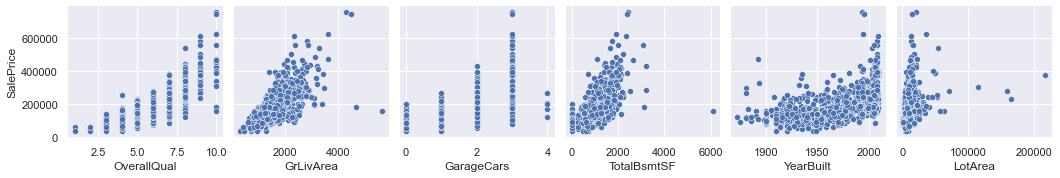

In [6]:
sns.set()

        
sns.pairplot(dataset,
             x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt','LotArea'],
             y_vars=['SalePrice'])

plt.show()

Naturalmente, existe una relación estrecha entre el precio de venta y las variables esperadas. Sin embargo, se incluyeron dos gráficos que arrojan resultados inesperados:

La primera sorpresa es que la relación entre precio y capacidad del garaje no se condice con lo esperado. Tanto porque el precio de las viviendas con un garaje para 4 vehiculos se encuentra dentro del mismo rango de aquellas sin garaje, como porque la diferencia entre una vivienda sin garaje y una con capacidad para un solo vehiculo es mucho menor a la esperada.

En segundo lugar, la incidencia del tamaño del terreno en el precio de venta, aunque existente, parece ser muy pequeña. Podemos notar en el sexto grafico la existencia de inmuebles con terrenos excepcionalmente grandes, las cuales se vendieron a precios por debajo de los 400000 dolares. De la misma forma, las viviendas mas caras no parecen ser, en ningun caso, excepcionalmente mas grandes que las demas.

**Correlaciones**

A partir del siguiente Heatmap se intenta determinar si existe alguna correlación fuerte que se haya pasado por alto, es decir, que no haya sido omitida a proposito, y que merezca la pena revisar.
Como se menciono recien, algunas correlaciones se omitieron a proposito, ya sea para evitar decir cosas obvias, ya sea porque aunque dicha correlación exista, nos resulta poco importante para este analisis.

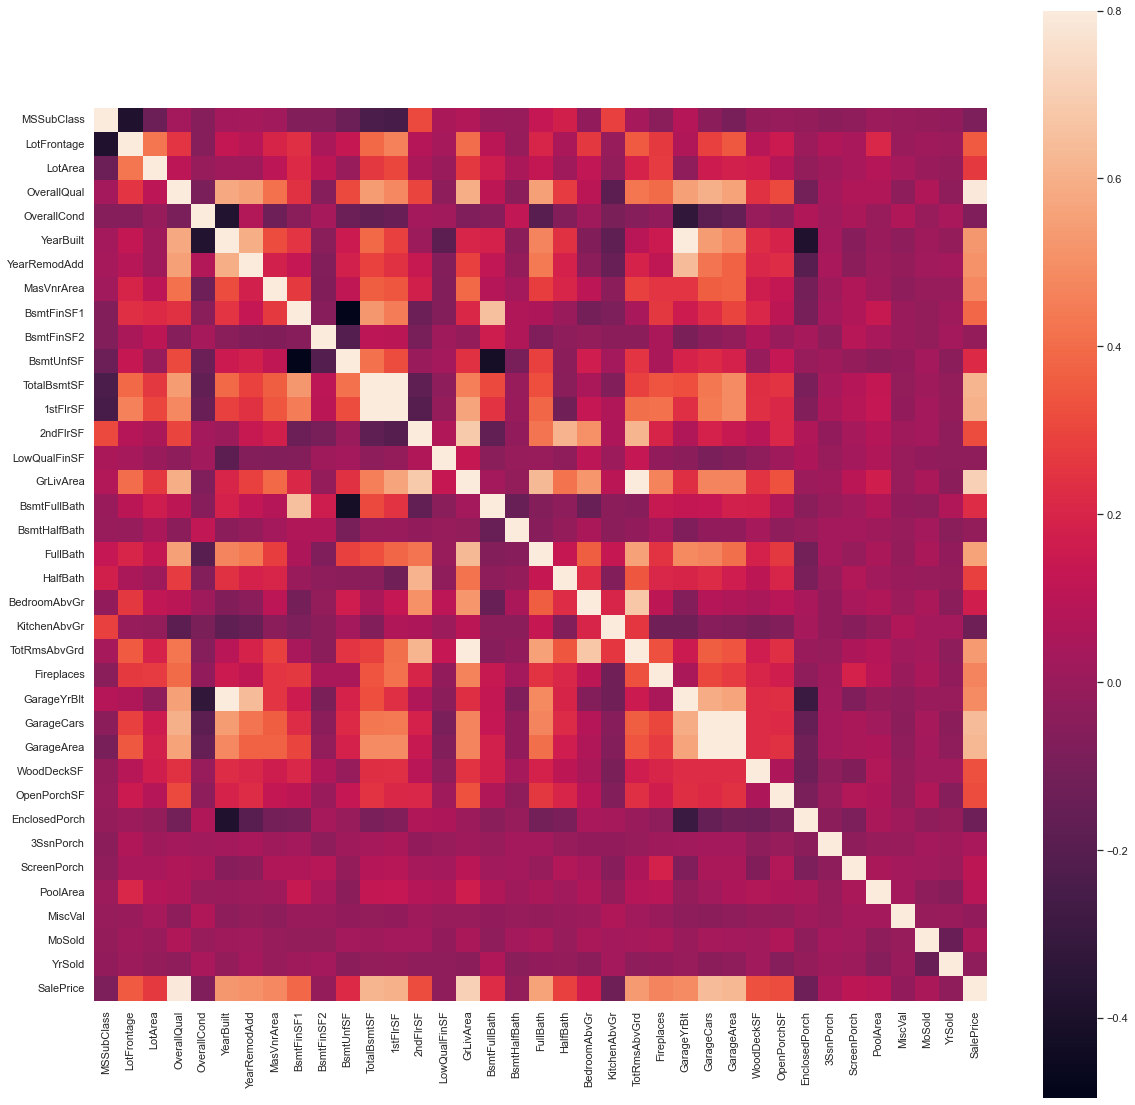

In [7]:
correlacion = dataset.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlacion, vmax=.8, square=True);

Como vemos en este gráfico, no parece haber una correlación fuerte que merezca un analisis mas detallado. La mayoría de las correlaciones realmente altas (por encima de 0.6) se corresponden principalmente con columnas que contienen información estrechamente relacionada por motivos mas que obvios, como pueden ser el año en que se construyo la casa y el garaje, o bien el tamaño del garaje y su capacidad. 
Podemos, sin embargo, determinar en base a la ultima columna, cuales son las variables que mayor correlación guardan con el precio de venta. De estas se destaca "OverallQual", el cual contiene una valoración de los materiales usados, los metodos y el acabado de las viviendas. Cabe mencionar que no tenemos información que indique como fueron tomadas esas medidas, ni que tan fiables son, por lo cual se dificulta indagar mucho mas al respecto.

Respecto a las demás medidas, vemos que la correlación no es tan alta, incluso en algunos casos es extremadamente baja.
Dejaremos que el modelo de ML se encargue de procesar esta información, pero tendremos en cuenta aquellas correlaciónes bajas, para evaluar posteriormente si al eliminarlas el modelo ajusta mejor, o no.

# Respondiendo las preguntas clave

## Primera pregunta:

Hemos identificado algunas de las variables que mayor correlación guardan con el precio de venta.
Lo que haremos a continuacion sera generar una regresión logistica, partiendo de la relacion entre "SalePrice" y las dos columnas que, segun el analisis bivariado, parecen tener mayor incidencia:

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

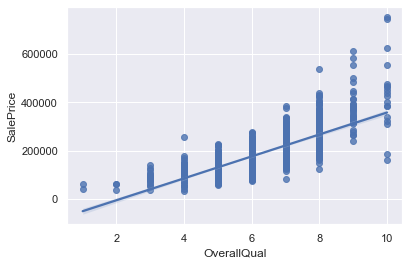

In [8]:
sns.regplot(x=dataset['OverallQual'], y=dataset['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

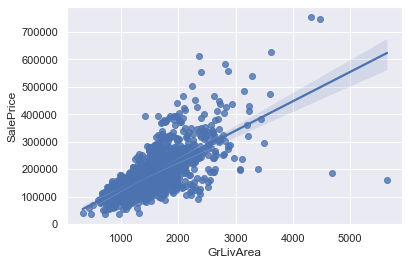

In [9]:
sns.regplot(x=dataset['GrLivArea'], y=dataset['SalePrice'])

Por ultimo, el siguiente Scatterplot combina ambos analisis en uno solo, mostrando la correlación entre las tres variables:

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

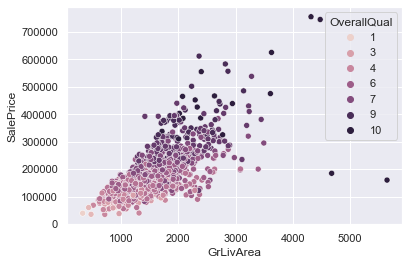

In [10]:
sns.scatterplot(x=dataset['GrLivArea'], y=dataset['SalePrice'], hue=dataset['OverallQual'])

Podemos observar una relación directa entre las tres variables, pues, a medida que nos desplazamos "hacia arriba" en cualquier eje, el valor de las otras dos variables también aumenta.

## Segunda pregunta:

En contraparte con la respuesta anterior, procederemos a enlistar las variables numericas que menor correlación parecen guardar con el precio de venta, para luego ver si al eliminarlas el modelo mejora o no:

- MSSubClass
- OverallCond
- BsmtFinSF2
- LowQualFinSF
- BsmtHalfBath
- KitchenAbvGrd
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold

## Tercera pregunta:

En base a los datos observados, vale la pena hacer un primer intento por responder cual o como creemos, en esta primera instancia, que sería el mejor modelo para intentar un analisis predictivo.

Dado que las correlaciones, dentro de todo, se adecuan a lo esperado (aunque con algunas sorpresas), probablemente la apuesta segura sea por un modelo relativamente simple.

# Machine Learning

Constuimos un primer modelo. El mismo sera un Random Forest

In [11]:
model = RandomForestRegressor(random_state=1)

features=['LotArea', 'OverallQual',
          'GrLivArea', 'GarageCars', 
          'TotalBsmtSF', 'YearBuilt']

trainprice = dataset.SalePrice
trainfeats = dataset[features]
price_tr, price_val, feats_tr, feats_val = train_test_split(trainprice, trainfeats, random_state=1)

model.fit(feats_tr, price_tr)

RandomForestRegressor(random_state=1)

Construimos una tabla que contenga estadisticas descriptivas del dataset completo, y de la prediccion recien realizada, para compararlas

In [12]:
firsttest = model.predict(feats_val)
predic_1 = pd.DataFrame({"estimatedprice": firsttest })

predic_compare = pd.DataFrame({"Resultado de la prediccion":predic_1.describe().estimatedprice,"Dataset Completo":dataset.describe().SalePrice})

predic_compare

Resultado de la prediccion  Dataset Completo
count                  365.000000       1460.000000
mean                176852.110108     180921.195890
std                  70708.298617      79442.502883
min                  62012.000000      34900.000000
25%                 127718.540000     129975.000000
50%                 161431.820000     163000.000000
75%                 200832.000000     214000.000000
max                 550123.660000     755000.000000

Vamos a utilizar el error absoluto medio(MAE) para determinar cual modelo se acerca mas a predecir correctamente las variables:

In [13]:
# # Calculate the mean absolute error of your Random Forest model on the validation data

first_mae = mean_absolute_error(price_val, firsttest)

print("Error Absoluto Medio: {}".format(first_mae))

Error Absoluto Medio: 18732.797382909328


El Error absoluto medio es de 18732, lo que constituye, aproximadamente, el 10% del promedio del valor "SalePrice" en el dataset original. Procederemos a continuación a construir modelos alternativos: